In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
#reading the data
data = pd.read_csv('adult.data.csv')

In [251]:
#describe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [252]:
#checking for null values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [253]:
data.head()
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [271]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [254]:
#How many people of each race are represented in this dataset? 
#This should be a Pandas series with race names as the index labels. (`race` column)
eachRaceNum = data['race'].value_counts()
eachRaceNum

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [255]:
# What is the average age of men?
numOfMen = data.loc[data['sex']=='Male']
avAgeMen = numOfMen['age'].mean()

In [256]:
#average number of women
numWomen = data.loc[data['sex']!='Male']
avAgeWo = numWomen['age'].mean()

In [257]:
# Percentage of people who have a Bachelor's degree?
totalNumOfPeople = data.shape[0]

numOfBachelor = data.loc[data['education']=='Bachelors'].shape[0]
percent = (numOfBachelor/totalNumOfPeople)*100
percent

16.44605509658794

Text(0.5, 1.0, 'Population dditribution between men and women')

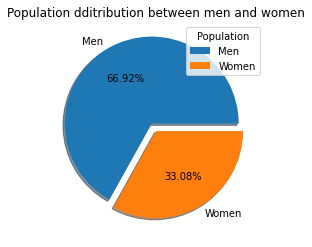

In [312]:
#visualize the percentage of pple with various education
ppleArr = [numOfMen.shape[0],numWomen.shape[0]]
labels = ['Men', 'Women']
explodes = [0.1,0]
plt.pie(ppleArr,labels = labels, explode = explodes, shadow = True,autopct = lambda p:f'{p:.2f}%')
plt.legend(title = 'Population')
plt.title('Population dditribution between men and women')

<BarContainer object of 5 artists>

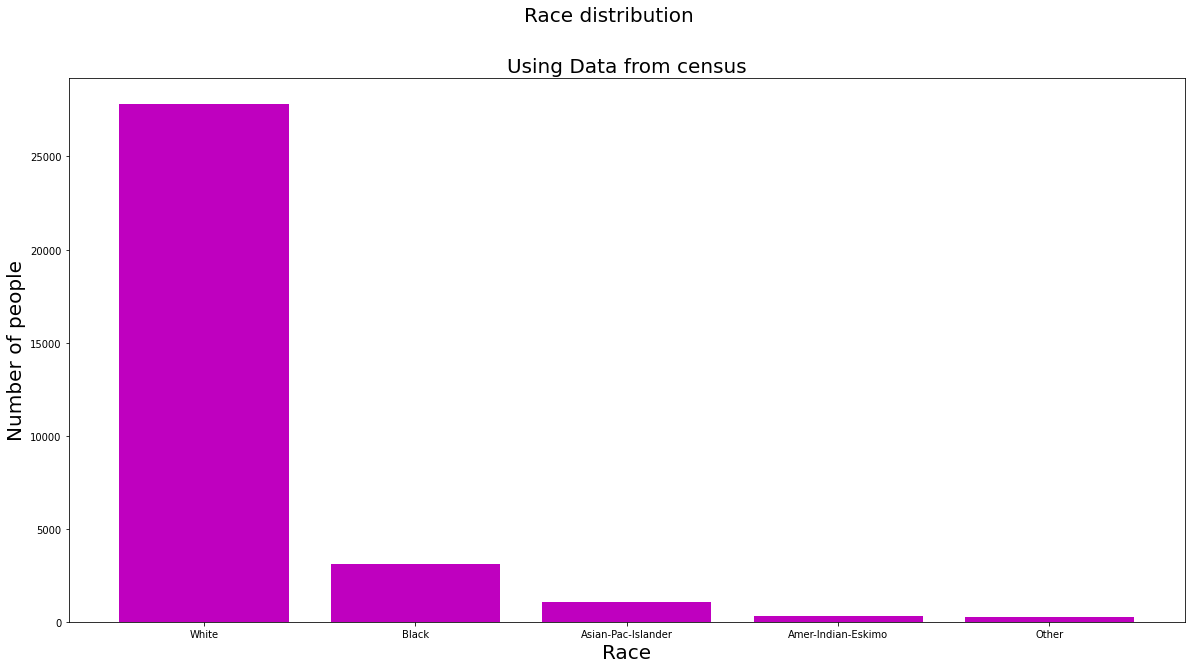

In [320]:
raceDf = pd.DataFrame(data['race'].value_counts())
raceNumArray = np.array(raceDf['race'])
races = np.array(data['race'].unique())
plt.figure(figsize=(20, 10))
plt.suptitle('Race distribution', fontsize=20) 
plt.title('Using Data from census', fontsize=20)  
plt.xlabel('Race', fontsize=20) 
plt.ylabel('Number of people', fontsize=20)
plt.bar(races, raceNumArray, color = 'm')

In [272]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [258]:
#What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

#finding total number of people making 50k
moreThan50k = data.loc[(data['salary']=='>50K') | (data['salary']=='>=50K')].shape[0]
pplWithMasterBachPhd = data.loc[(data['education']=='Bachelors') | (data['education']=='Masters') | (data['education']=='Doctorate')]

answer = (pplWithMasterBachPhd.shape[0]/moreThan50k)*100
answer

95.53628363729116

In [259]:
# What percentage of people without advanced education make more than 50K?
ppleWithoutAdvEd = data.loc[(data['education']!='Bachelors') & (data['education']!='Masters') & (data['education']!='Doctorate')]
num = ppleWithoutAdvEd.loc[ppleWithoutAdvEd['salary'] =='>50K'].shape[0]

val = (num/moreThan50)*100
val

55.54138502741998

In [260]:
#What is the minimum number of hours a person works per week?
hrsDesc = data['hours-per-week'].min()

In [261]:
#What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
(data['hours-per-week'] == 1).value_counts()
ans = (20/moreThan50k)*100
ans

0.255069506440505

In [262]:
#What country has the highest percentage of people that earn >50K and what is that percentage?
grp1 = data.groupby('native-country')
moreThan50 = data.loc[(data['salary']=='>50K')].shape[0]
countries = data['native-country'].unique()
grp = grp1.get_group(countries[1])

#loop through each group of countrie, in each group get number of people earning > 50k, 
#express as a percentage...return the max()
over50Earners = []
counts = []
for name,group in grp1:
    df = grp1.get_group(name)
    num0fPeople = [df.shape[0]]
    over50Earners.append(df.loc[df['salary']=='>50K'].shape[0])
    counts.append(name)
over50Earners = np.array(over50Earners)
maxNum = np.max(over50Earners)

np.column_stack((counts, over50Earners)) #for side by side comparison
percentage = (np.max(over50Earners)/moreThan50) * 100
percentage

91.45517153424308

In [263]:
#Identify the most popular occupation for those who earn >50K in India.
#get those earning over 50k, get their occupations, count and get maximum
set1 = data.loc[(data['salary'])=='>50K']
occ = set1['occupation'].value_counts().max()
occ

1968